In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\bhuvp\Downloads\survey lung cancer.csv")
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV

In [6]:
df['GENDER'] = df['GENDER'].map({'M':1,'F':0})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES':1,'NO':0})

In [7]:
df.head(20)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
5,0,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
6,1,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
7,0,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
8,0,68,2,1,2,1,1,2,1,1,1,1,1,1,1,0
9,1,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1


<Axes: >

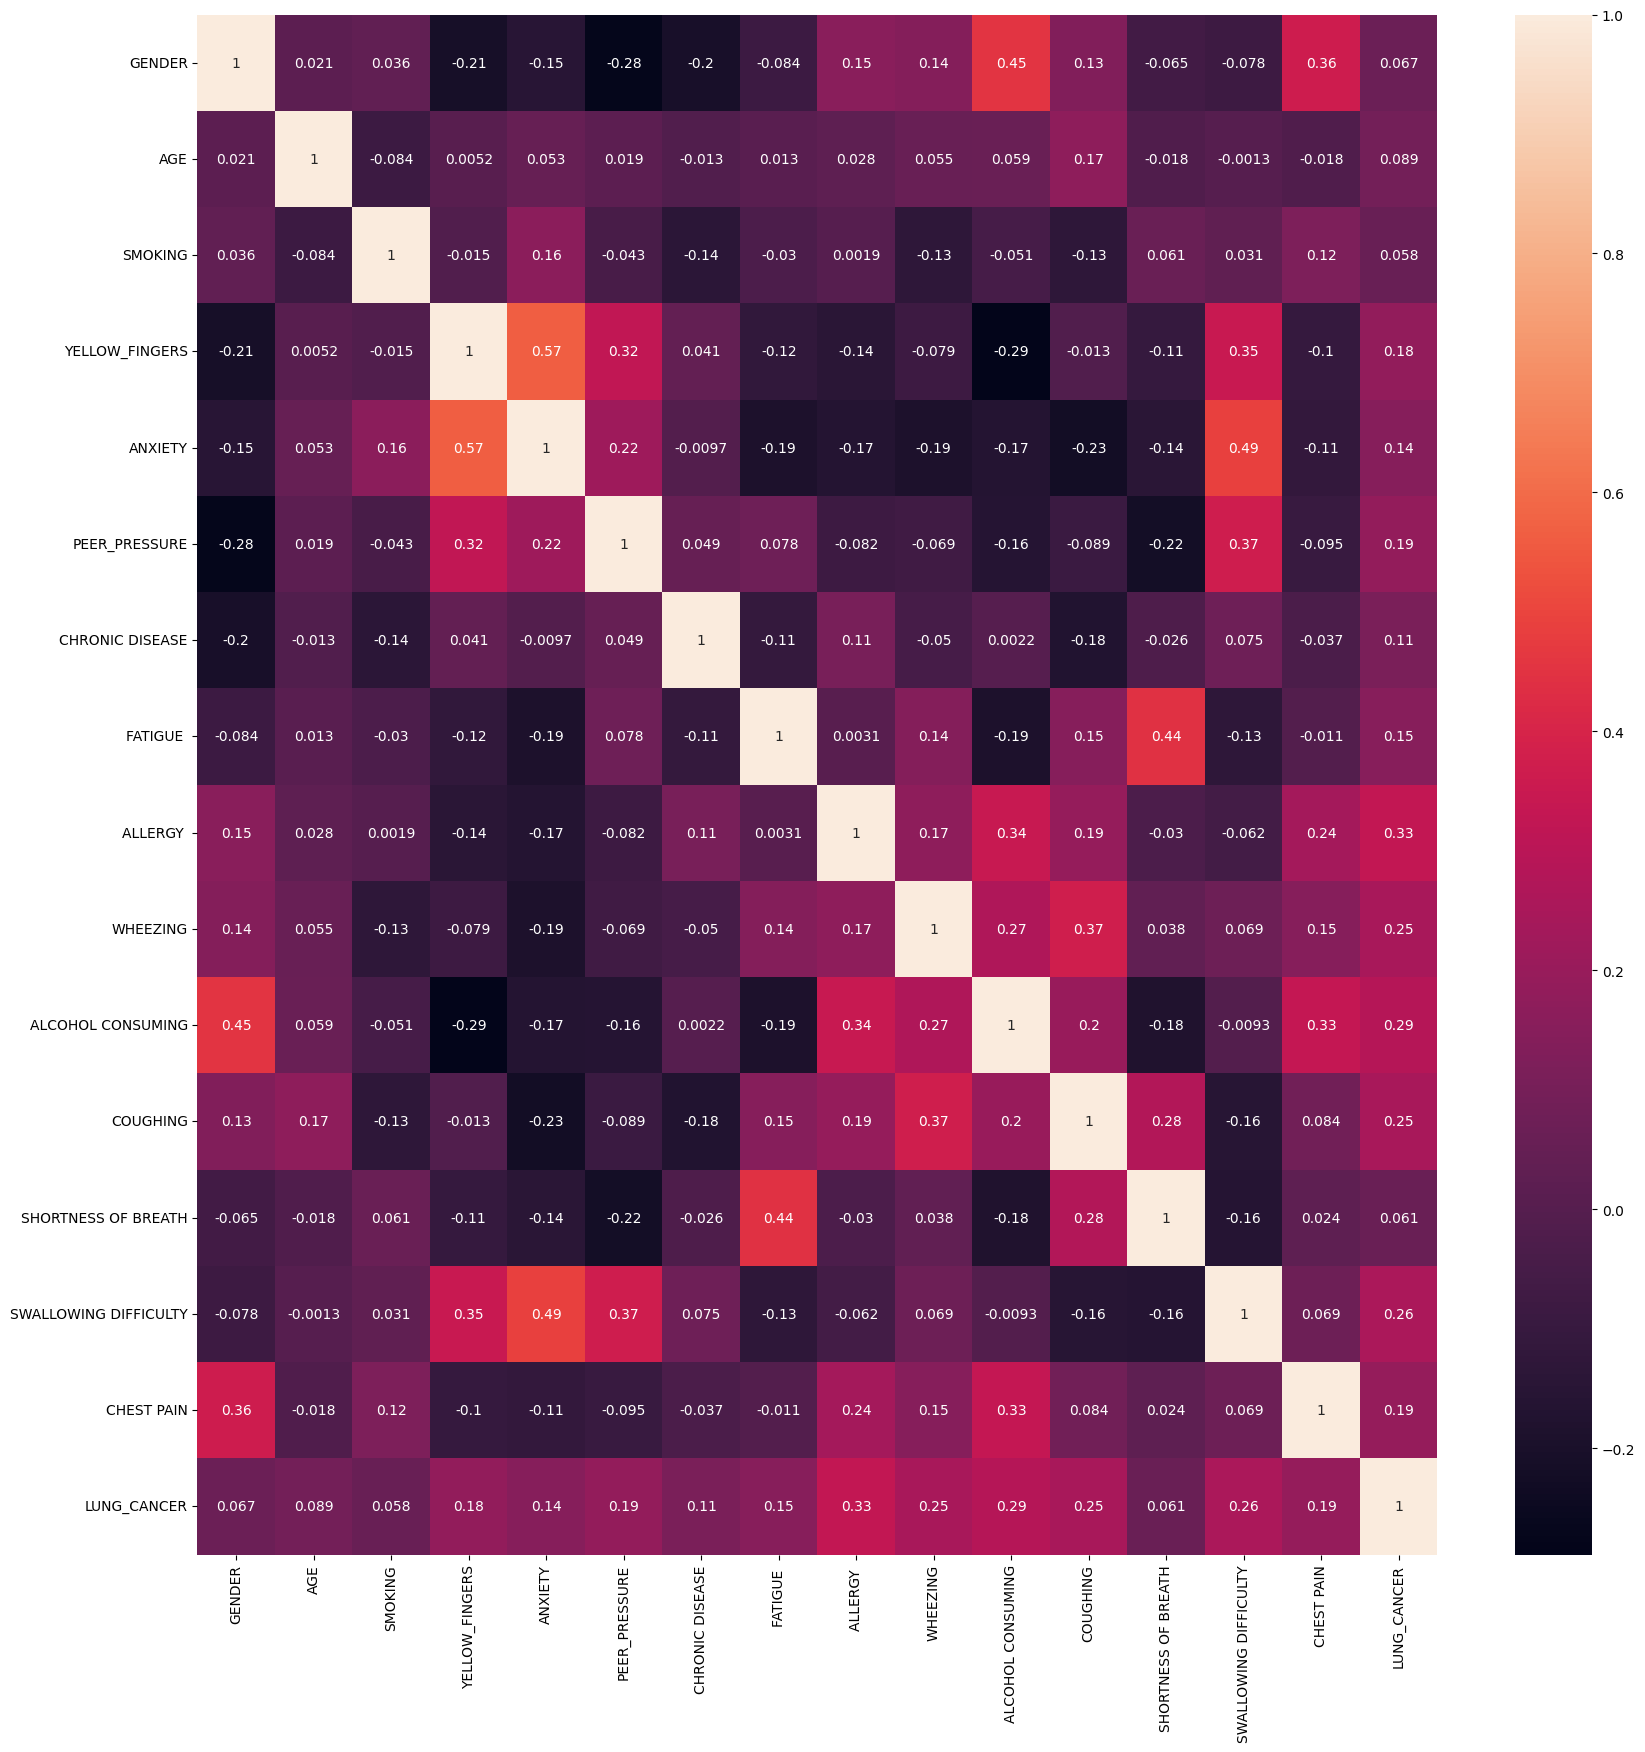

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [9]:
df = df[((df['AGE']>40) & (df['AGE']<85))]

In [10]:
for i in df.columns:
    print(df[i].value_counts())
    print('-------------------')

GENDER
1    161
0    144
Name: count, dtype: int64
-------------------
AGE
64    20
63    19
56    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
72    10
71    10
68     9
77     9
57     9
51     8
54     8
65     7
74     6
75     5
53     4
52     4
73     4
47     4
66     4
76     4
49     3
44     2
48     2
78     2
81     2
79     1
46     1
Name: count, dtype: int64
-------------------
SMOKING
2    172
1    133
Name: count, dtype: int64
-------------------
YELLOW_FINGERS
2    175
1    130
Name: count, dtype: int64
-------------------
ANXIETY
2    154
1    151
Name: count, dtype: int64
-------------------
PEER_PRESSURE
2    154
1    151
Name: count, dtype: int64
-------------------
CHRONIC DISEASE
2    153
1    152
Name: count, dtype: int64
-------------------
FATIGUE 
2    204
1    101
Name: count, dtype: int64
-------------------
ALLERGY 
2    169
1    136
Name: count, dtype: int64
-------------------
WHEEZING
2    170
1    135
Name: coun

In [11]:
x = df.drop('LUNG_CANCER',axis=1)
y = df['LUNG_CANCER']

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

In [13]:
ss = StandardScaler()
ss.fit(x_train,y_train)

StandardScaler()

In [14]:
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

In [15]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [16]:
accuracy_score(y_test,lr.predict(x_test))*100

93.44262295081968

In [17]:
lr.score(x_train,y_train)

0.9467213114754098

In [18]:
'''for i in range(1,42):
    lr1 = LogisticRegression(random_state=i)
    x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=i)
    lr1.fit(x_train1,y_train1)
    print(i,'.',accuracy_score(y_test1,lr1.predict(x_test1))*100,'--------------',lr1.score(x_train1,y_train1)*100)'''

"for i in range(1,42):\n    lr1 = LogisticRegression(random_state=i)\n    x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=i)\n    lr1.fit(x_train1,y_train1)\n    print(i,'.',accuracy_score(y_test1,lr1.predict(x_test1))*100,'--------------',lr1.score(x_train1,y_train1)*100)"

In [19]:
for i in range(1,43):
    x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=i)
    ss.fit(x_train1)
    x_train1 = ss.transform(x_train1)
    x_test1 = ss.transform(x_test1)
    lr = LogisticRegression(random_state=i)
    lr.fit(x_train1,y_train1)
    print(i,'.',accuracy_score(y_test1,lr.predict(x_test1))*100,'-----------',lr.score(x_train1,y_train1)*100)

1 . 93.44262295081968 ----------- 94.26229508196722
2 . 93.44262295081968 ----------- 95.49180327868852
3 . 95.08196721311475 ----------- 93.85245901639344
4 . 95.08196721311475 ----------- 95.08196721311475
5 . 95.08196721311475 ----------- 93.44262295081968
6 . 95.08196721311475 ----------- 93.44262295081968
7 . 88.52459016393442 ----------- 96.31147540983606
8 . 96.72131147540983 ----------- 94.26229508196722
9 . 96.72131147540983 ----------- 94.67213114754098
10 . 93.44262295081968 ----------- 95.49180327868852
11 . 93.44262295081968 ----------- 94.67213114754098
12 . 88.52459016393442 ----------- 94.67213114754098
13 . 93.44262295081968 ----------- 93.85245901639344
14 . 93.44262295081968 ----------- 94.67213114754098
15 . 98.36065573770492 ----------- 92.62295081967213
16 . 91.80327868852459 ----------- 95.49180327868852
17 . 91.80327868852459 ----------- 94.26229508196722
18 . 95.08196721311475 ----------- 93.85245901639344
19 . 86.88524590163934 ----------- 95.08196721311475
20

In [20]:
import pickle

In [21]:
pickle.dump(lr,open('LungCancer.pkl','wb'))

In [22]:
x.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

In [23]:
pickle.dump(ss,open('Scaler.pkl','wb'))